# Market Overview Notebook

In [1]:
from utils import gold_silv_ratio, fear_n_greed_idx, vix, bitcoin, gold_silver, snp500

## S&P 500

Current S&P 500 Index: 6309.62


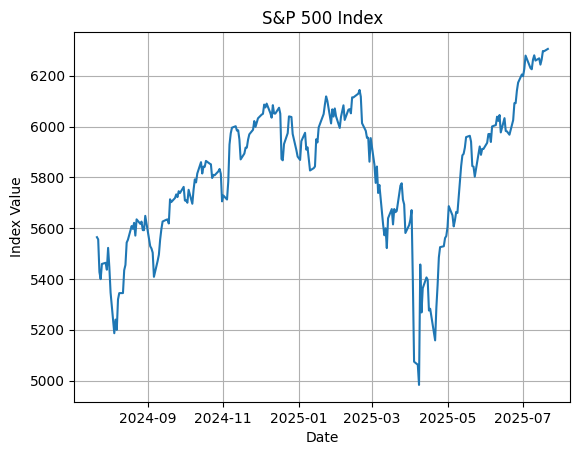

In [2]:
snp_data = snp500()

## Fear & Greed Index

In [3]:
_ = fear_n_greed_idx()

Fear & Greed Index Value: 73.1714285714286
Market Sentiment: greed


## Volatility Index

Current VIX: 16.52
Stable market conditions.


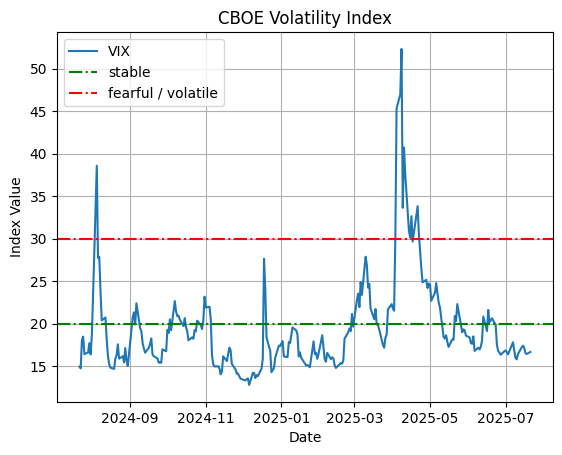

In [4]:
vix_idx = vix()

## Gold / Silver


Gold: $3444.00 per ounce
Silver: $39.62 per ounce
Gold/Silver Ratio: 86.93
Silver likely undervalued.


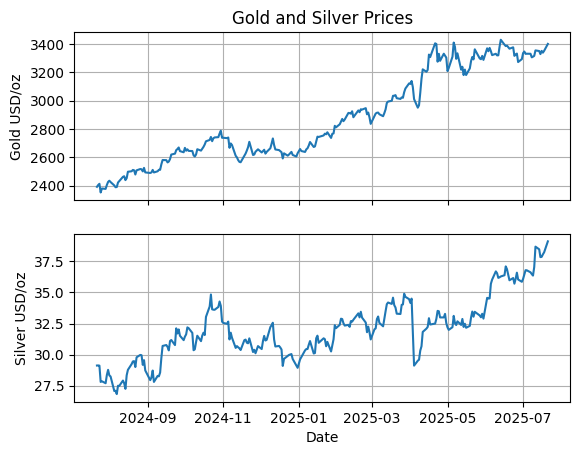

In [5]:
gld_slv_ratio = gold_silv_ratio()
gld_data, slv_data = gold_silver()

## Bitcoin

Current Bitcoin Price (USD): 119659.27


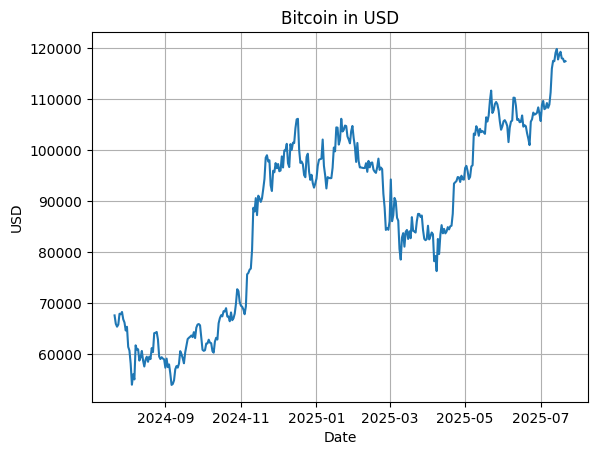

In [6]:
bitcoin_data = bitcoin()